# Differential Equations (Mr. P Solver)

Video Link: https://youtu.be/MM3cBamj1Ms

Codes: https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbUQ0LVI0VnlDNG1FeVhxSlZqcHFFdXBnVWlJd3xBQ3Jtc0tsMTE5OUJ5dUVzY3dhQ3QydHFzejdSZVY1VHlvQ0JKWXA5SEdIMXhVdWpBRExQMDFrNnM4bmFOeHFZS1ZTZlZpSzBjZ1p6MWQwekpSNXMzemNCTjRoR0tYc3ZISmRNeGZsRDZyQ3gtOVNuektLa1p5aw&q=https%3A%2F%2Fgithub.com%2Flukepolson%2Fyoutube_channel%2Fblob%2Fmain%2FPython%2520Tutorial%2520Series%2Fodes1.ipynb&v=MM3cBamj1Ms

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

There are 2 main solvers in scipy -
1. `odeint`: Uses a particular solver called lsoda from the FORTRAN library odepack.
2. `solve_ivp`: Can choose from a list of possible solvers.

In [2]:
odeint

<function scipy.integrate._odepack_py.odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)>

In [3]:
solve_ivp

<function scipy.integrate._ivp.ivp.solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)>

## First Order ODEs

**Example:** Air Friction while falling: $$ \frac{dv}{dt} - \alpha v^2 + \beta = 0 \hspace{10mm} v(0) = 0 $$

**Solution:** $$ \frac{dv}{dt} = f(t,v) $$  or, $$ \frac{dv}{dt} = \alpha v^2 - \beta $$

In [4]:
def dvdt(t,v):
    return 3*v**2 -5
v0=0

In [5]:
t = np.linspace(0,1,10)

In [6]:
sol1 = odeint(dvdt, y0=v0, t=t, tfirst=True)
sol2 = solve_ivp(dvdt, t_span=(0,max(t)), y0=[v0], t_eval=t)

In [7]:
v1 = sol1.T[0]
v2 = sol2.y[0]

Text(0, 0.5, 'v(t)')

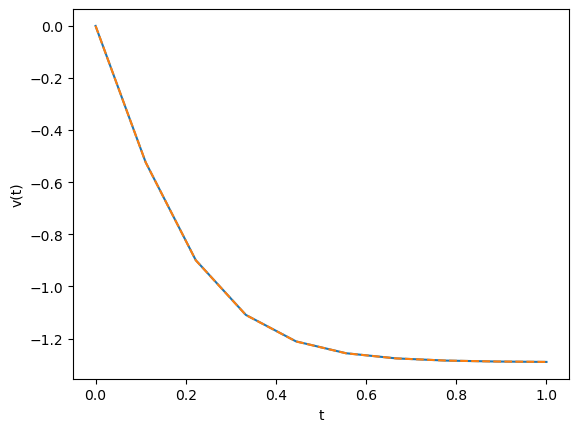

In [8]:
plt.plot(t,v1)
plt.plot(t,v2, '--')
plt.xlabel('t')
plt.ylabel('v(t)')  # Same solution is obtained by the 2 methods.

## Coupled 1st Order ODEs

$$ y_1' = y_1 + y_2^2 + 3x \hspace{10mm} y_1(0)=0 $$

$$ y_2' = 3y_1 + y_2^3 - \cos(x) \hspace{10mm} y_2(0)=0 $$

Let, 
$$ \vec{S} = \begin{bmatrix} y_1 \\ y_2 \end{bmatrix} \hspace{10mm} \implies  \hspace{10mm} \frac{d\vec{S}}{dx} = \vec{f}(x, \vec{S}) = \vec{f}(x, y_1, y_2) =  \begin{bmatrix} y_1' \\ y_2' \end{bmatrix}  = \begin{bmatrix}  y_1 + y_2^2 + 3x\\ 3y_1 + y_2^3 - \cos(x) \end{bmatrix} $$

In [9]:
def dSdx(x,S):
    y1, y2 = S
    return [y1 + y2**2 + 3*x, 3*y1 + y2**3 - np.cos(x)]
y10 = 0
y20 = 0
S0 = (y10, y20)

In [10]:
x = np.linspace(0,1,20)
sol = odeint(dSdx, y0=S0, t=x, tfirst=True)

In [11]:
y1sol = sol.T[0]
y2sol = sol.T[1]

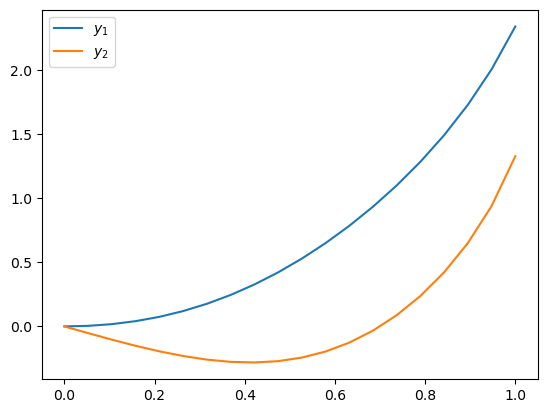

In [12]:
plt.plot(x, y1sol, label='$y_1$')
plt.plot(x, y2sol, label='$y_2$')
plt.legend()

## 2nd Order ODEs

*Can't solve 2nd order ODEs directly. We need to convert 2nd order ODE into 2 1st order ODEs and solve those.*

**Example:** Consider, $$ \ddot{x} = -\dot{x}^2 + \sin(x) $$

**Solution:** To solve this our 1st order ODEs will be,
$$ \dot{x} = v $$  $$ \dot{v} = -v^2 + \sin(x) $$
These are 2 coupled 1st order ODEs. Let, the initial conditions for this problem are $\dot{x_0} = 0$ and $x_0 = 1$.

In [13]:
def dSdt(S,t):
    x, v = S
    return [v, -v**2 + np.sin(x)]
x0 = 1
v0 = 0
S0 = (x0, v0)

In [14]:
t = np.linspace(0,5,50)
sol = odeint(dSdt, y0=S0, t=t)

In [15]:
xsol = sol.T[0]
vsol = sol.T[1]

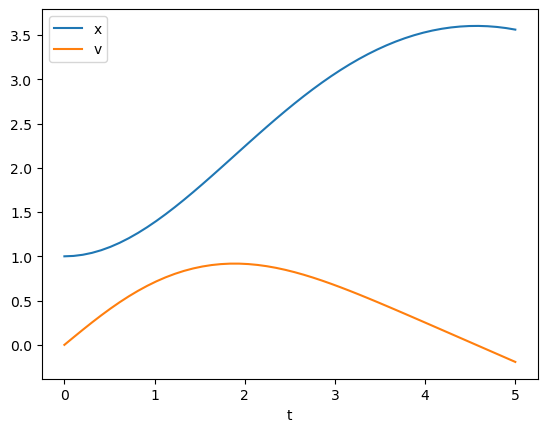

In [16]:
plt.plot(t, xsol, label='x')
plt.plot(t, vsol, label='v')
plt.xlabel('t')
plt.legend()

**Example:** $$ \dddot{x_1}= -2\dot{x_2}^2 + x_2 $$

$$ \dddot{x_2}= -\ddot{x_1}^3 + \dot{x_2} + x_1 + \sin(t) $$

**Solution:** Dependent variables are $$ x_1, x_2, v_1 = \dot{x_1}, v_2 = \dot{x_2}, a_1 = \ddot{x_1} = \dot{v_1}, a_2 = \ddot{x_2} = \dot{v_2} $$

So, $$ \dot{a_1} = -2v_2^2 + x_2 $$
$$ \dot{a_2} = -a_1^3 + v_2 + x_1 + \sin(t) $$

Then,
$$ \vec{S} = \begin{bmatrix} x_1\\ v_1 \\ a_1 \\ x_2 \\ v_2 \\ a_2 \end{bmatrix} \hspace{10mm} \implies \hspace{10mm} \frac{d\vec{S}}{dt} = \begin{bmatrix} \dot{x_1}\\ \dot{v_1} \\ \dot{a_1} \\ \dot{x_2} \\ \dot{v_2} \\ \dot{a_2} \end{bmatrix} =  \begin{bmatrix} v_1\\ a_1 \\ -2v_2^2 + x_2 \\ v_2 \\ a_2 \\ -a_1^3 + v_2 + x_1 + \sin(t) \end{bmatrix} $$

In [17]:
def dSdt(S, t):
    x1, v1, a1, x2, v2, a2 = S
    return [v1, a1, -2*v2**2 + x2, v2, a2, -a1**3 + v2 + x1 + np.sin(t)]

x10, v10, a10, x20, v20, a20 = 0, 0, 0, 0, 0, 0
S0 = (x10, v10, a10, x20, v20, a20)

In [18]:
t = np.linspace(0,1,50)
sol = odeint(dSdt, y0=S0, t=t)

In [19]:
x1sol = sol.T[0]
x2sol = sol.T[3]

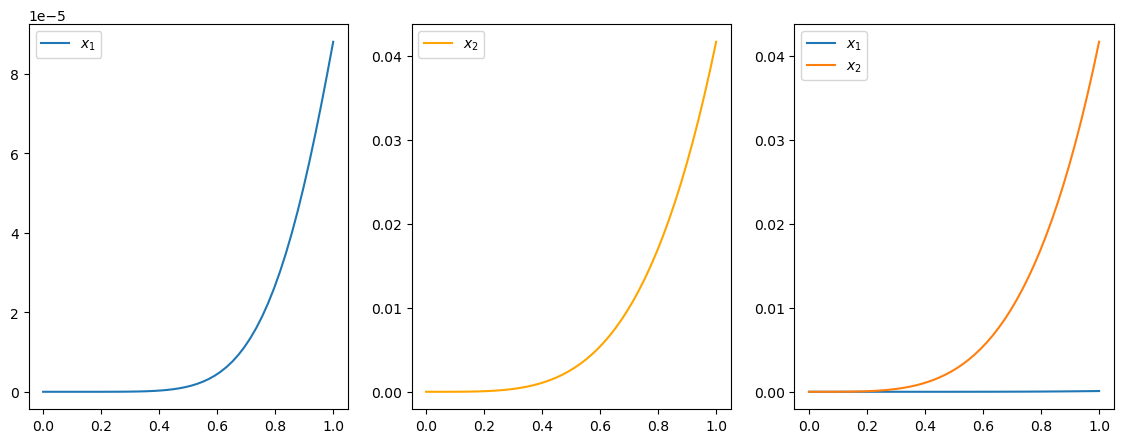

In [20]:
fig, axes = plt.subplots(1,3, figsize=(14,5))
ax1 = axes[0]
ax1.plot(t, x1sol, label='$x_1$')
ax1.legend()
ax2 = axes[1]
ax2.plot(t, x2sol, 'orange', label='$x_2$')
ax2.legend()
plt.plot(t, x1sol, label='$x_1$')
plt.plot(t, x2sol, label='$x_2$')
plt.legend()

### A Final Note:

*Do it later*